**DATA LOADING**

In [1]:
import pandas as pd
data = pd.read_csv("car_data.csv")

In [2]:
print(data.head())  

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**DATA PREPROCESSING**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("car_data.csv")

In [6]:
# Check for missing values
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [7]:
# Before filling missing values
print("Before filling missing values:")
print(data.isnull().sum()) 

# Data Cleaning: Handling missing values
data.fillna(method='ffill', inplace=True)

# After filling missing values
print("\nAfter filling missing values:")
print(data.isnull().sum())  


Before filling missing values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

After filling missing values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
e

In [8]:
data = pd.get_dummies(data)

In [9]:
X = data.drop('price', axis=1)
y = data['price']  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MODEL BUILDING**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 7036.82288806159
Mean Squared Error: 178507387.43108785


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
# Choose a Regression Model (Decision Tree Regression)
model = DecisionTreeRegressor(random_state=42)

In [17]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 2078.4309024390245
Mean Squared Error: 11941492.700436316


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


In [20]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of the tree
}

In [21]:
# Choose a Regression Model (Decision Tree Regression)
model = DecisionTreeRegressor(random_state=42)


In [22]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, None]},
             scoring='neg_mean_absolute_error')

In [23]:
best_model = grid_search.best_estimator_

In [24]:
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Best Model Parameters:", grid_search.best_params_)
print("Mean Absolute Error (After Fine-tuning):", mae)

Best Model Parameters: {'max_depth': 10}
Mean Absolute Error (After Fine-tuning): 1918.027733791953


**EVALUATION**

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 1918.027733791953
Mean Squared Error (MSE): 9719422.737781249
Root Mean Squared Error (RMSE): 3117.598873777903
R-squared (R2) Score: 0.876882091519033


In [26]:
# Calculate Mean Absolute Error for Baseline
baseline_pred = y_train.mean()  # Baseline prediction (e.g., mean of training target variable)
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
print("Baseline Mean Absolute Error:", baseline_mae)


Baseline Mean Absolute Error: 6339.80211005354


In [27]:
tolerance = 1000
correct_predictions = sum(abs(y_test - y_pred) <= tolerance)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions * 100

print("Accuracy within $1000 tolerance:", accuracy, "%")


Accuracy within $1000 tolerance: 53.65853658536586 %


In [28]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
print("Cross-Validation Mean Absolute Error:", cv_mae)


Cross-Validation Mean Absolute Error: 3252.780950754936


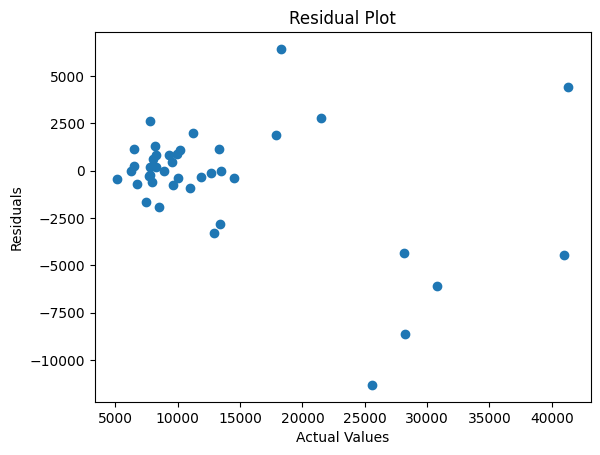

In [29]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**FINE TUNING**

In [30]:
data['car_length_width'] = data['carlength'] * data['carwidth']

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

import numpy as np
data['log_wheelbase'] = np.log(data['wheelbase'])


In [31]:
# Example: Feature importance from a tree-based model (e.g., Random Forest)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_


In [41]:
# Example: Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Example: Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Example: Support Vector Regression
from sklearn.svm import SVR
model = SVR()


In [42]:
# Example: Grid Search for Random Forest Regression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [43]:
# Example: Random Forests
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Example: Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)


In [44]:
# Example: Lasso Regression
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)

# Example: Ridge Regression
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)


In [45]:
# Example: Cross-Validation with Random Forest Regression
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 1918.027733791953
Mean Squared Error (MSE): 9719422.737781249
Root Mean Squared Error (RMSE): 3117.598873777903
R-squared (R2) Score: 0.876882091519033


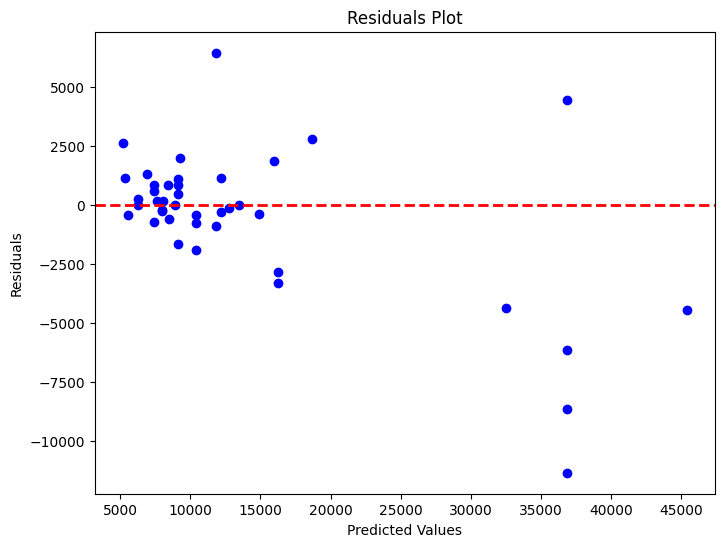

In [47]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.show()


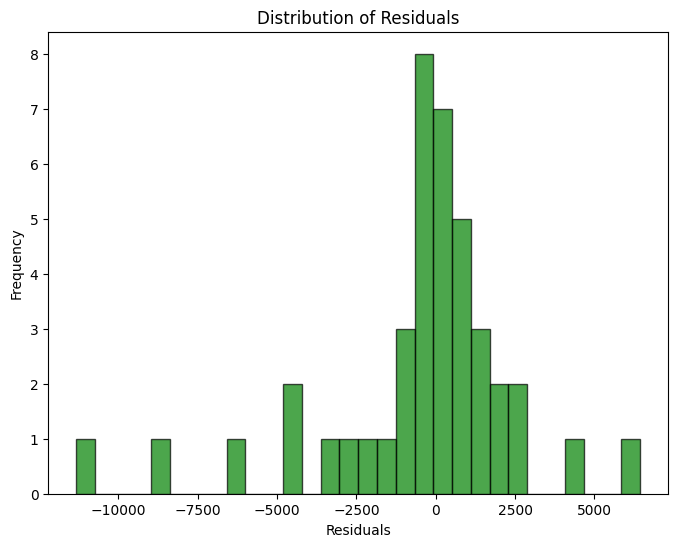

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


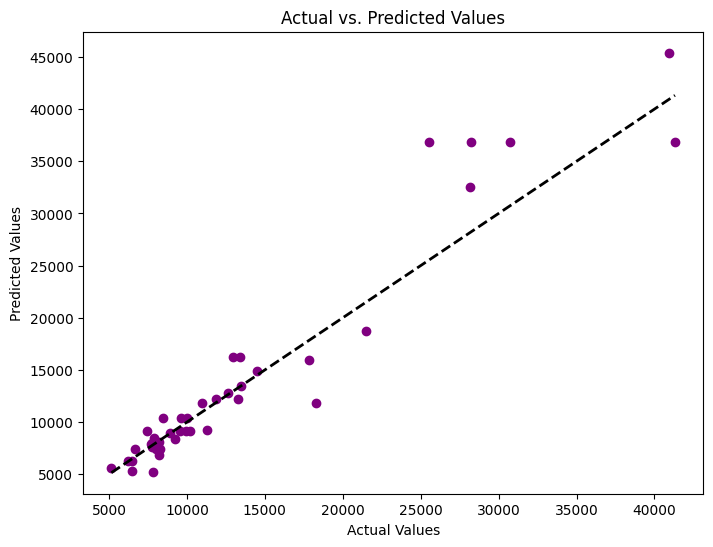

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
